In [95]:
with open('/content/drive/MyDrive/IR-assignment-2-data.txt', 'r') as f:
  lines = f.readlines()

# Part 2

In [96]:
relevance_scores = []

for line in lines:
  c     = line.split()
  a, r  = int(c[0]), c[1]
  if r!="qid:4":continue
  relevance_scores.append(a)

relevance_scores.sort(reverse=True)

Directly using relevance scores here.

In [97]:
print(relevance_scores)

[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Tabulating count for each relevance score.

In [98]:
rel_dict = {}
for i in relevance_scores:
  if i not in rel_dict:
    rel_dict[i] = 0
  rel_dict[i] += 1

In [99]:
rel_dict

{0: 59, 1: 26, 2: 17, 3: 1}

We can re-rank each document with the same relevance score such that the maximum DCG remains the same. In this case, the total number of ways would be $59!\times26!\times17!\times1$, which would also be the number of unique files made.

In [100]:
dcg = relevance_scores[0]
for i in range(len(relevance_scores)):
  if relevance_scores[i]==dcg:continue                # Skip the initial value, as it has already been considered.
  dcg += relevance_scores[i]/(np.log(i+1)/np.log(2))  # Follows 1-indexing, adjust accordingly. 

print("Max DCG:", dcg)

Max DCG: 20.989750804831445


Max DCG: 20.989750804831445


Writing new ranking for $qid:4$ to file:

In [101]:
all_lines = []

for line in lines:
  c = line.split()
  r = c[1]
  if r!="qid:4":continue
  all_lines.append(c)

all_lines.sort(reverse=True, key=lambda x: int(x[0]))

In [102]:
with open('/content/qid_4_max_dcg.txt', 'w') as f:
  for line in all_lines:
    f.write(' '.join(line)+'\n')

# Part 3

We use the idealized ranking from the previous part to calculate the DCG at rank $n$.

In [103]:
relevance_scores  = []
ideal_scores      = []

for line in lines:
  c     = line.split()
  a, r  = int(c[0]), c[1]
  if r!="qid:4":continue
  relevance_scores.append(a)
  ideal_scores.append(a)

ideal_scores.sort(reverse=True)

In [104]:
print(relevance_scores)
print(ideal_scores)

[0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0]
[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Part 3a.

In [105]:
dcg_50  = relevance_scores[0]
idcg_50 = ideal_scores[0]

for i in range(50):
  if relevance_scores[i]==dcg_50:continue                # Skip the initial value, as it has already been considered.
  dcg_50 += relevance_scores[i]/(np.log(i+1)/np.log(2))  # Follows 1-indexing, adjust accordingly. 

for i in range(50):
  if ideal_scores[i]==idcg_50:continue                # Skip the initial value, as it has already been considered.
  idcg_50 += ideal_scores[i]/(np.log(i+1)/np.log(2))  # Follows 1-indexing, adjust accordingly. 

print("NDCG@50:", dcg_50/idcg_50)

NDCG@50: 0.3521042740324887


NDCG@50: 0.3521042740324887

## Part 3b.

In [107]:
dcg   = relevance_scores[0]
idcg  = ideal_scores[0]

for i in range(len(relevance_scores)):
  if relevance_scores[i]==dcg:continue                # Skip the initial value, as it has already been considered.
  dcg += relevance_scores[i]/(np.log(i+1)/np.log(2))  # Follows 1-indexing, adjust accordingly. 

for i in range(len(ideal_scores)):
  if ideal_scores[i]==idcg:continue                # Skip the initial value, as it has already been considered.
  idcg += ideal_scores[i]/(np.log(i+1)/np.log(2))  # Follows 1-indexing, adjust accordingly. 

print("NDCG of full dataset:", dcg/idcg)

NDCG of full dataset: 0.5979226516897831


NDCG for the whole dataset: 0.5979226516897831

# Part 4

Relevance values belong to $[0,4]$, but we will consider anything above and equal to $1$ as a positive sample.

In [108]:
scores  = []              # Tf-idf score list.
max_val = -float('inf')   # For normalizing scores.
min_val = float('inf')    # For normalizing scores.
gt      = []              # Ground truth relevance prediction, as per given file.
pred    = []              # Predicted relevance, {0,1}.

for line in lines:
  c       = line.split()
  a, r, b = int(c[0]), c[1], float(c[76][3:])

  if r!="qid:4":continue
  if b >= max_val: max_val = b
  if b < min_val: min_val = b

  if a==0:
    gt.append(0)
  else:
    gt.append(1)
  
  scores.append(b)

for score in scores:
  a = (score - min_val)/(max_val - min_val)   # Normalizing scores.
  pred.append(a)

import numpy as np

precision_scores = []
recall_scores = []
thresholds = np.linspace(0, 1, 100)           # Thresholding.

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

for t in thresholds:
  temp = []
  for p in pred:
    if p >= t:
      temp.append(1)
    else:
      temp.append(0)

  precision_scores.append(precision_score(gt, temp))  # Calculating precision
  recall_scores.append(recall_score(gt, temp))        # Calculating recall


Plotting precision-recall curve.

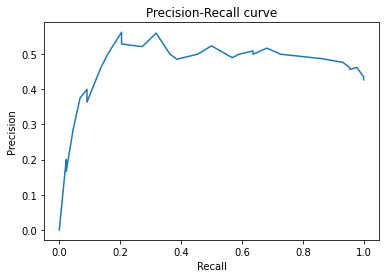

In [109]:
import matplotlib.pyplot as plt
plt.plot(recall_scores, precision_scores)
plt.title("Precision-Recall curve")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()